In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [190]:
os.listdir()

['emdat-india-floods.csv']

In [191]:
df = pd.read_csv("emdat-india-floods.csv")

In [192]:
df.isnull().sum()

Start date            0
End date              2
Country               3
ISO                   3
Location             29
Latitude            242
Longitude           242
Magnitude value     196
Magnitude scale       4
Disaster type         4
Disaster subtype      4
Disaster name       305
Disaster No.          4
dtype: int64

In [193]:
df.dropna(subset=["Country"], axis = 0, inplace=True)
df.dropna(subset=["Disaster type"], axis=0, inplace =True)

In [194]:
df.dropna(subset=["Disaster type"], axis=0, inplace =True)

In [195]:
df.describe()

,Latitude,Longitude,Magnitude value,Disaster name
count,63.000000,63.000000,109.000000,0.0
mean,24.075375,93.723190,115370.959725,NaN
std,13.778529,89.246202,143727.219857,NaN
min,9.880000,70.760000,0.000000,NaN
25%,17.877000,76.730000,29110.000000,NaN
50%,22.680000,80.930000,67610.000000,NaN
75%,27.227500,89.140000,135742.300000,NaN
max,118.278000,788.550000,762900.000000,NaN


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start date        301 non-null    object 
 1   End date          301 non-null    object 
 2   Country           301 non-null    object 
 3   ISO               301 non-null    object 
 4   Location          276 non-null    object 
 5   Latitude          63 non-null     float64
 6   Longitude         63 non-null     float64
 7   Magnitude value   109 non-null    float64
 8   Magnitude scale   301 non-null    object 
 9   Disaster type     301 non-null    object 
 10  Disaster subtype  301 non-null    object 
 11  Disaster name     0 non-null      float64
 12  Disaster No.      301 non-null    object 
dtypes: float64(4), object(9)
memory usage: 32.9+ KB


In [197]:
df["Start date"] = pd.to_datetime(df["Start date"])

In [198]:
df["year"] = pd.DatetimeIndex(df["Start date"]).year

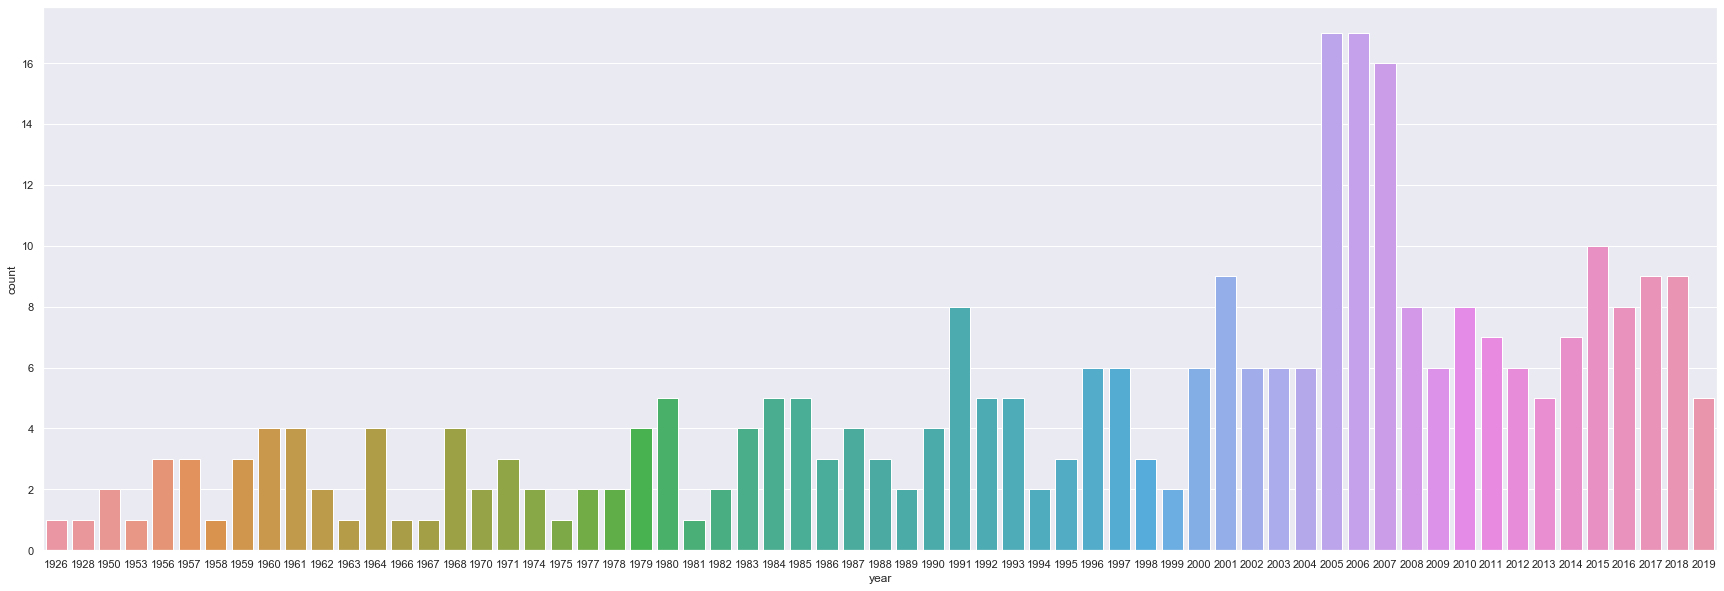

In [199]:
#Number of flood per year from year 1926-2019
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})
sns.set(style="darkgrid")
sns.countplot(x="year", data=df)

In [200]:
new_df = df

In [201]:
new_df = new_df[df["Disaster subtype"] != "--"]

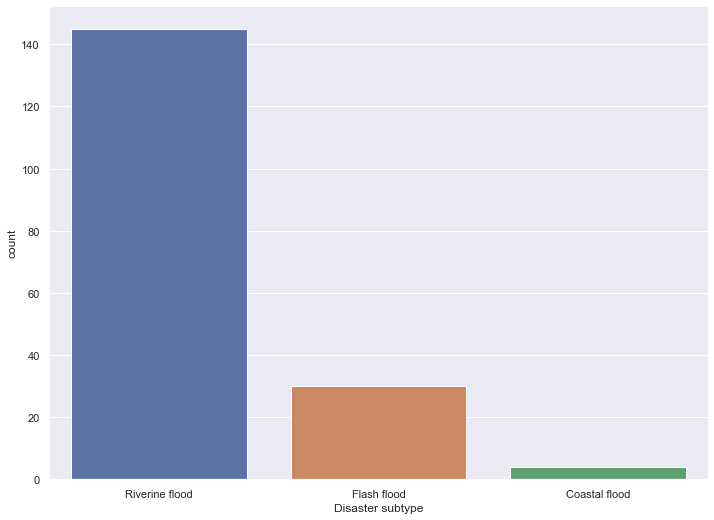

In [202]:

sns.set(rc={'figure.figsize':(11.8,8.7)})
sns.countplot(x="Disaster subtype", data=new_df)

In [203]:
new_df = new_df.dropna(subset=["Location"], axis = 0)

In [204]:
States = ["Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","National Capital Territory of Delhi","Puducherry"]

In [205]:
LOC = pd.DataFrame(columns = States)

In [206]:
for i in States:
    LOC[i] = df["Location"].str.count(i)

In [207]:
LOC[LOC>1.0] = 1

In [210]:
#StateWise number of flood
LOC.sum()

Andhra Pradesh                         30.0
Arunachal Pradesh                      21.0
Assam                                  66.0
Bihar                                  43.0
Chhattisgarh                            5.0
Goa                                    15.0
Gujarat                                40.0
Haryana                                14.0
Himachal Pradesh                       24.0
Jammu and Kashmir                      14.0
Jharkhand                               5.0
Karnataka                              21.0
Kerala                                 30.0
Madhya Pradesh                         19.0
Maharashtra                            27.0
Manipur                                 9.0
Meghalaya                               8.0
Mizoram                                 0.0
Nagaland                                4.0
Odisha                                  5.0
Punjab                                 20.0
Rajasthan                              21.0
Sikkim                          

Text(0, 0.5, 'number_of_flood')

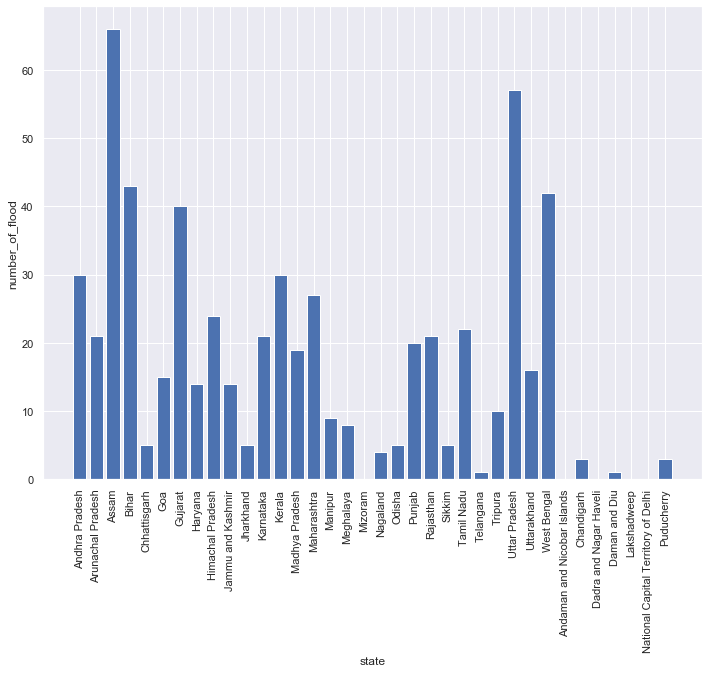

In [232]:
#BAR PLOT OF NUMBER OF FLOODS WRT TO STATES
plt.bar(LOC.columns, LOC.sum())
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("number_of_flood")

In [211]:
df["Magnitude value"].describe()

count       109.000000
mean     115370.959725
std      143727.219857
min           0.000000
25%       29110.000000
50%       67610.000000
75%      135742.300000
max      762900.000000
Name: Magnitude value, dtype: float64